In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import boxcox

In [38]:
df = pd.read_csv("database/casks_database__casks_valuation.csv")
df

,auction_date,distillery,region,country,strength,rla,bulk_litres,distillery_status,cask_type,cask_filling,...,age,bottles_at_cask_strength,volume_12m,volume_6m,volume_3m,inf_adj_hammer_price,inf_adj_hammer_price_per_bottle_at_cask_strength,inf_adj_hammer_price_per_litre_of_alcohol,inf_adj_hammer_price_per_litre_of_alcohol_per_age,inf_adj_hammer_price_per_age
0,2025-01-06,Bruichladdich,Islay,Scotland,50.4,74.90,148.61,Operational,Barrel,First Fill,...,20.00,212.30,105,63,26,19060.19,89.78,254.48,12.72,953.01
1,2025-01-06,Copper House,England,England,64.8,74.78,115.40,Operational,Barrel,NaN,...,13.00,164.86,105,63,26,1030.28,6.25,13.78,1.06,79.25
2,2024-12-02,Copper House,England,England,64.8,74.78,115.40,Operational,Barrel,NaN,...,13.00,164.86,132,70,45,1028.76,6.24,13.76,1.06,79.14
3,2024-10-07,Dailuaine,Speyside,Scotland,59.3,125.73,212.02,Operational,Hogshead,Second Fill,...,15.00,302.89,124,67,37,3587.73,11.84,28.54,1.90,239.18
4,2024-10-07,Dailuaine,Islay,Scotland,61.0,122.00,200.00,Operational,Hogshead,Second Fill,...,8.00,285.71,124,67,37,1808.33,6.33,14.82,1.85,226.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,2024-09-08,Undisclosed Distillery,Lowlands,Scotland,62.8,139.79,222.60,NaN,Hogshead,NaN,...,3.69,318.00,100,45,25,3118.48,9.81,22.31,6.05,845.12
251,2024-09-08,Undisclosed Distillery,Lowlands,Scotland,62.3,136.13,218.50,NaN,Hogshead,NaN,...,3.69,312.14,100,45,25,3118.48,9.99,22.91,6.21,845.12
252,2024-09-08,Undisclosed Distillery,Lowlands,Scotland,62.6,140.91,225.10,NaN,Hogshead,NaN,...,3.69,321.57,100,45,25,3118.48,9.70,22.13,6.00,845.12
253,2024-09-08,Undisclosed Distillery,Lowlands,Scotland,63.1,147.53,233.80,NaN,Hogshead,NaN,...,3.69,334.00,100,45,25,3118.48,9.34,21.14,5.73,845.12


In [39]:
df.describe()

,strength,rla,bulk_litres,age,bottles_at_cask_strength,volume_12m,volume_6m,volume_3m,inf_adj_hammer_price,inf_adj_hammer_price_per_bottle_at_cask_strength,inf_adj_hammer_price_per_litre_of_alcohol,inf_adj_hammer_price_per_litre_of_alcohol_per_age,inf_adj_hammer_price_per_age
count,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000
mean,60.040784,100.335804,169.943089,12.504627,242.775875,72.650980,40.866667,21.286275,18315.588667,84.055412,253.595843,14.280667,1119.273216
std,5.531907,52.940962,83.283838,7.455178,118.976671,34.068824,20.671928,12.435361,36333.558653,163.936504,628.246404,22.668586,1331.181625
min,37.370000,22.880000,43.270000,0.650000,61.810000,2.000000,2.000000,1.000000,357.690000,1.480000,3.240000,0.410000,44.710000
25%,57.650000,65.300000,125.985000,7.000000,179.980000,41.500000,20.500000,9.000000,3167.480000,14.440000,34.610000,5.180000,438.005000
50%,60.800000,94.860000,164.000000,11.000000,234.290000,81.000000,45.000000,23.000000,6393.750000,32.660000,80.000000,8.120000,798.420000
75%,63.100000,121.500000,198.415000,15.005000,283.451429,97.000000,59.000000,31.000000,18578.510000,72.150000,178.965000,13.405000,1285.130000
max,69.700000,314.980000,511.330000,38.000000,730.470000,134.000000,84.000000,46.000000,322086.750000,1252.570000,6105.910000,210.330000,11094.960000


# Exploring numerical X variables

In [40]:
df.columns

Index(['auction_date', 'distillery', 'region', 'country', 'strength', 'rla',
       'bulk_litres', 'distillery_status', 'cask_type', 'cask_filling',
       'previous_spirit', 'age', 'bottles_at_cask_strength', 'volume_12m',
       'volume_6m', 'volume_3m', 'inf_adj_hammer_price',
       'inf_adj_hammer_price_per_bottle_at_cask_strength',
       'inf_adj_hammer_price_per_litre_of_alcohol',
       'inf_adj_hammer_price_per_litre_of_alcohol_per_age',
       'inf_adj_hammer_price_per_age'],
      dtype='object')

In [41]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = [col for col in numerical_columns if 'hammer_price' not in col]
numerical_columns

['strength',
 'rla',
 'bulk_litres',
 'age',
 'bottles_at_cask_strength',
 'volume_12m',
 'volume_6m',
 'volume_3m']

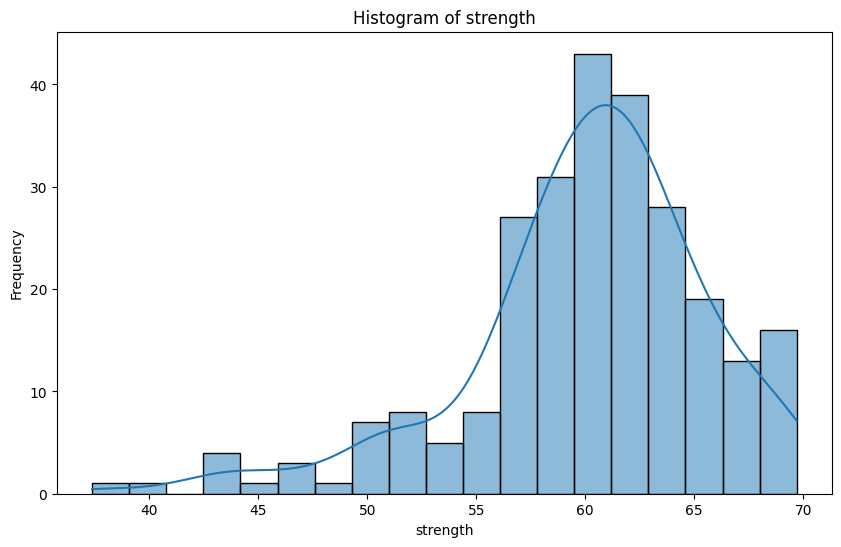

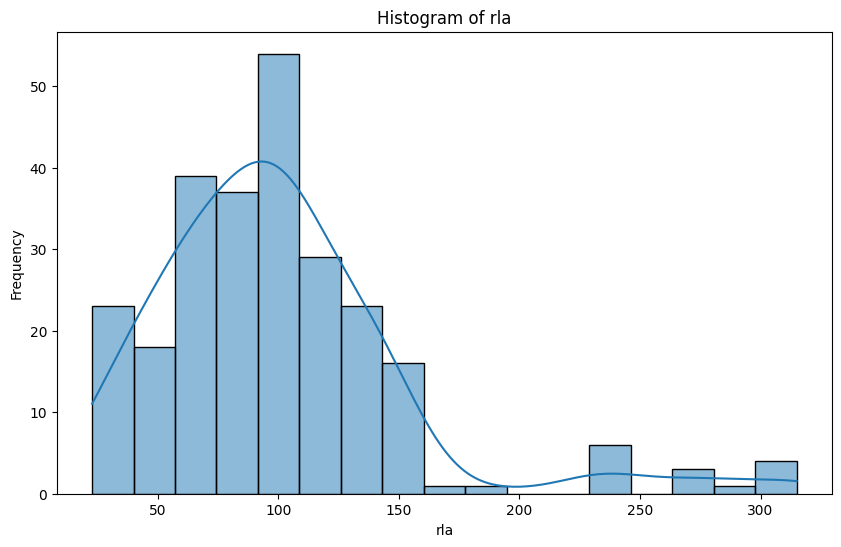

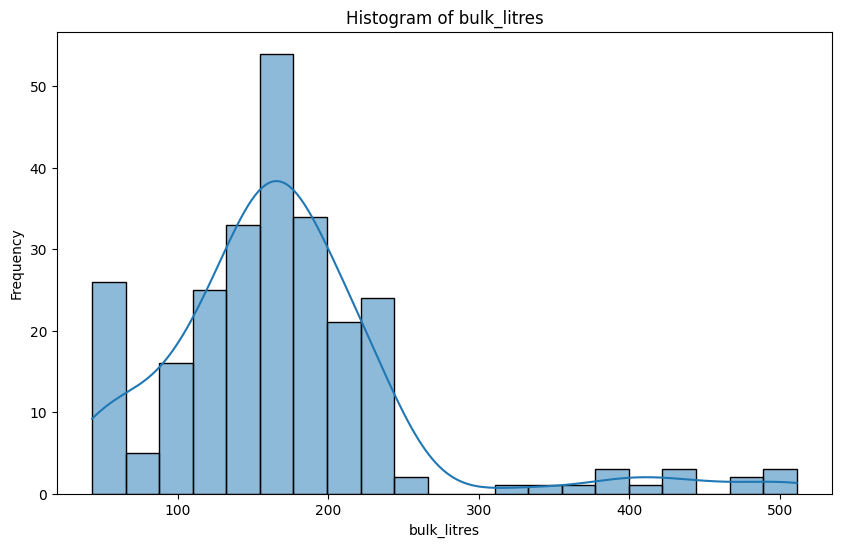

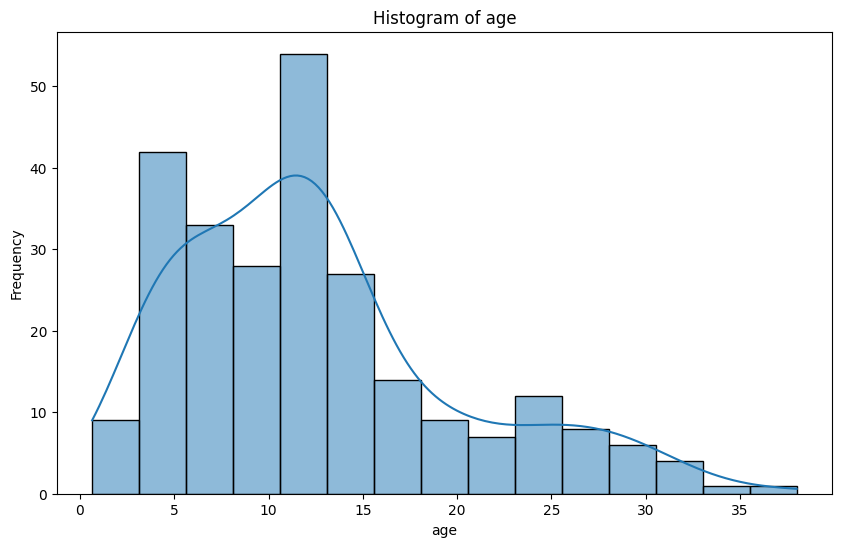

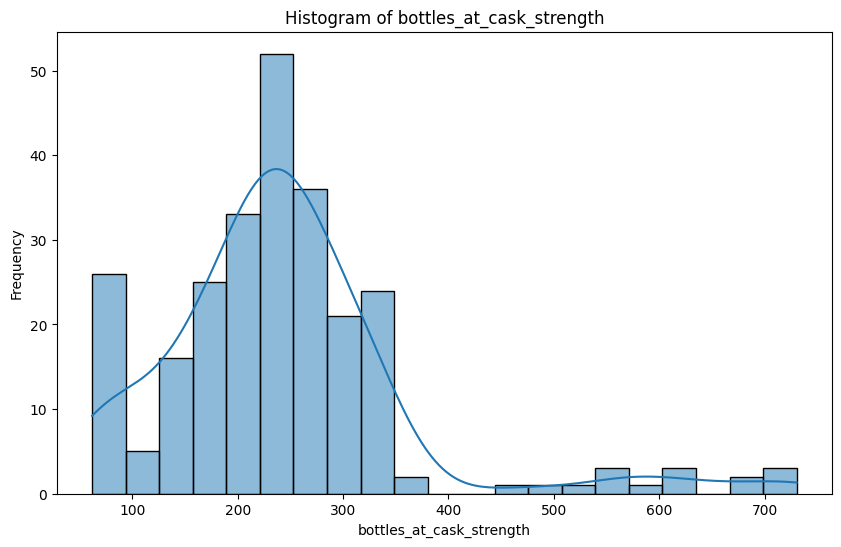

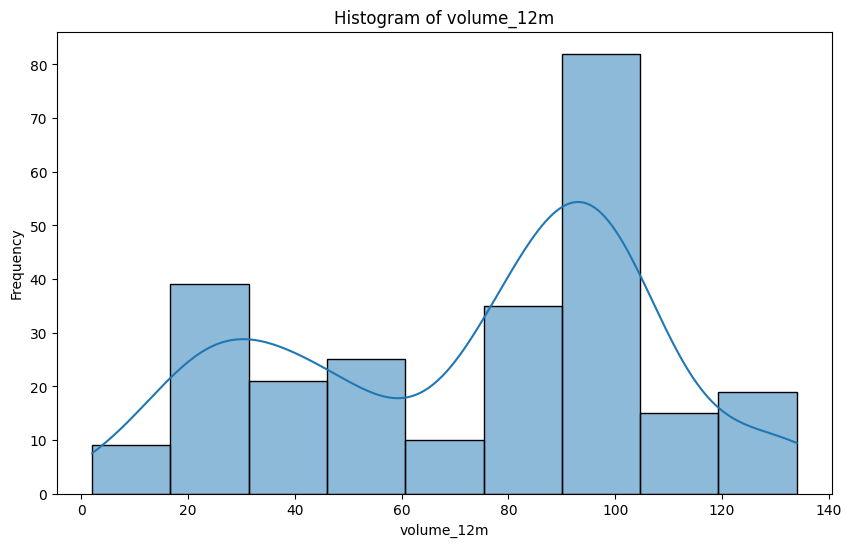

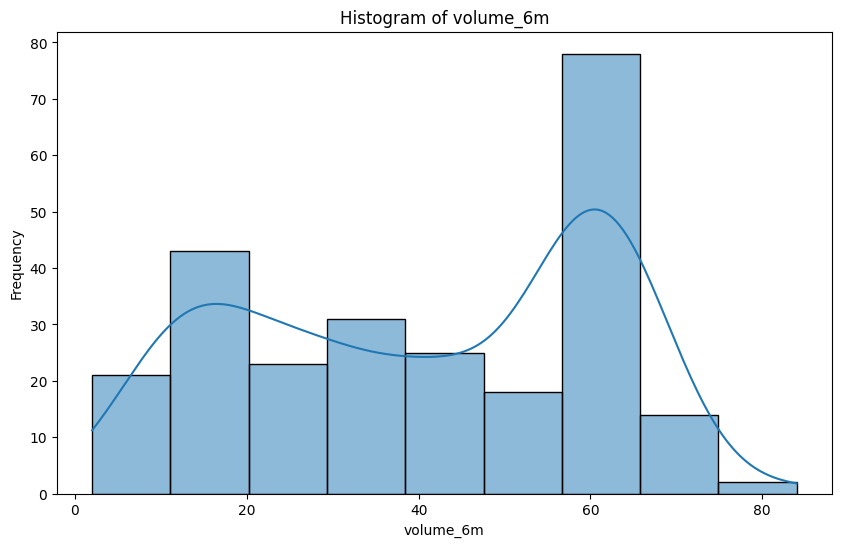

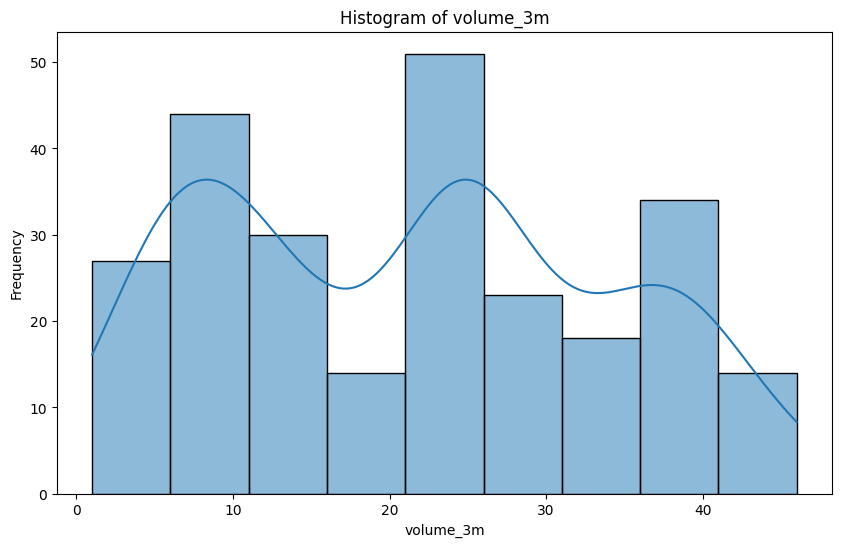

In [42]:
for column in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column].dropna(), kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Exploring categorical X variables

In [43]:
categorical_columns = ['distillery', 'region', 'country', 'distillery_status', 'cask_type', 'cask_filling', 'previous_spirit']

In [44]:
df[categorical_columns] = df[categorical_columns].fillna('Undisclosed')

distillery
distillery
Bruichladdich                 49
Tullibardine                  38
Undisclosed Distillery        14
North British                 13
Springbank                    10
Craigellachie                  9
Ben Nevis                      9
Port Dundas                    9
Macallan                       8
Glenallachie                   6
Glenrothes                     5
Glasgow                        5
Longmorn                       4
Dalmunach                      4
Arran                          4
Fettercairn                    4
Copper House                   4
Glenglassaugh                  3
Bunnahabhain                   3
Glentauchers                   3
Ardmore                        3
Strathmill                     2
Arran (Lochranza)              2
Dailuaine                      2
Glen Ord                       2
Glen Spey                      2
Knockdhu                       2
Bonnington                     2
Tamnavulin                     2
Ardnamurchan         

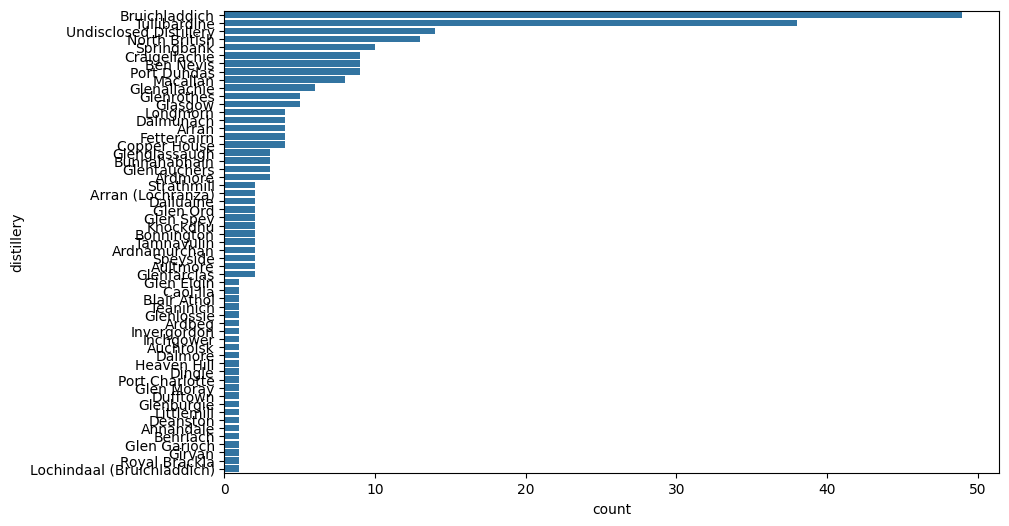

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


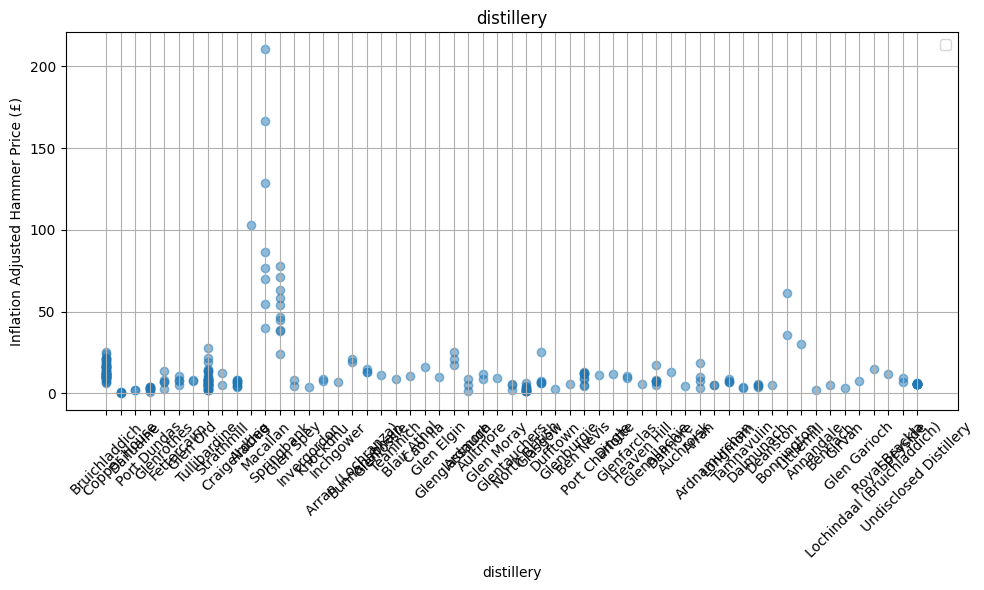



region
region
Highlands      73
Speyside       60
Islay          57
Lowlands       46
Campbeltown    10
England         4
Islands         3
Ireland         1
USA             1
Name: count, dtype: int64


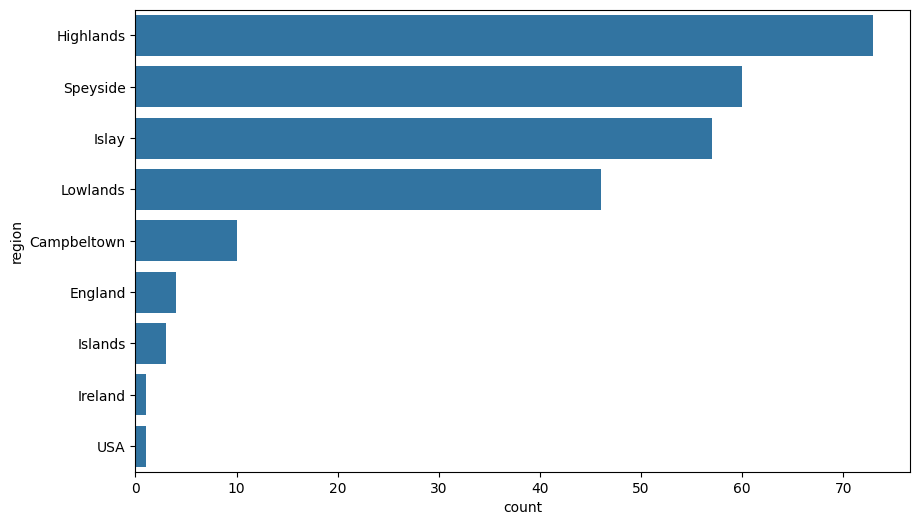

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


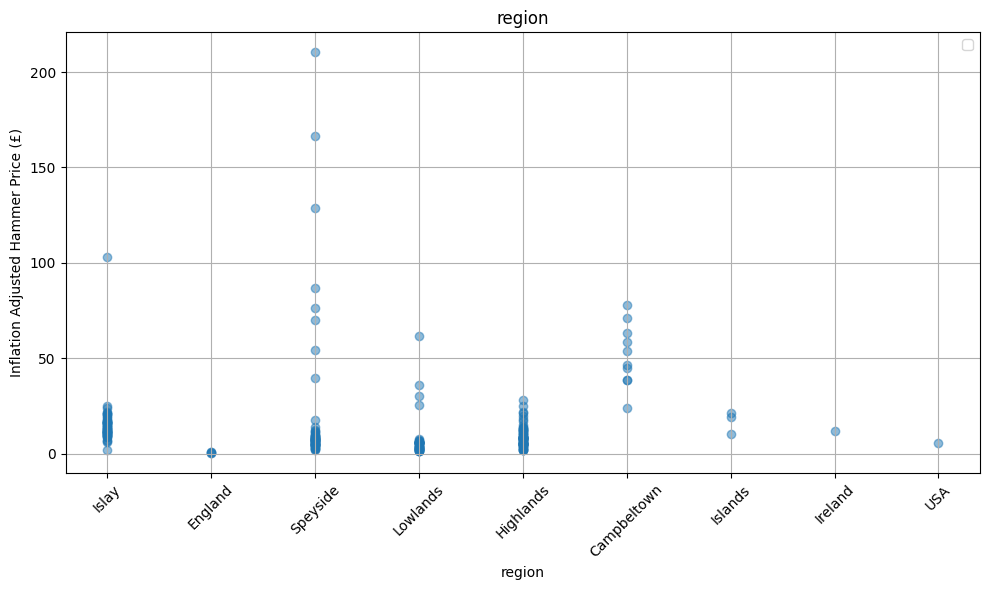



country
country
Scotland    249
England       4
Ireland       1
USA           1
Name: count, dtype: int64


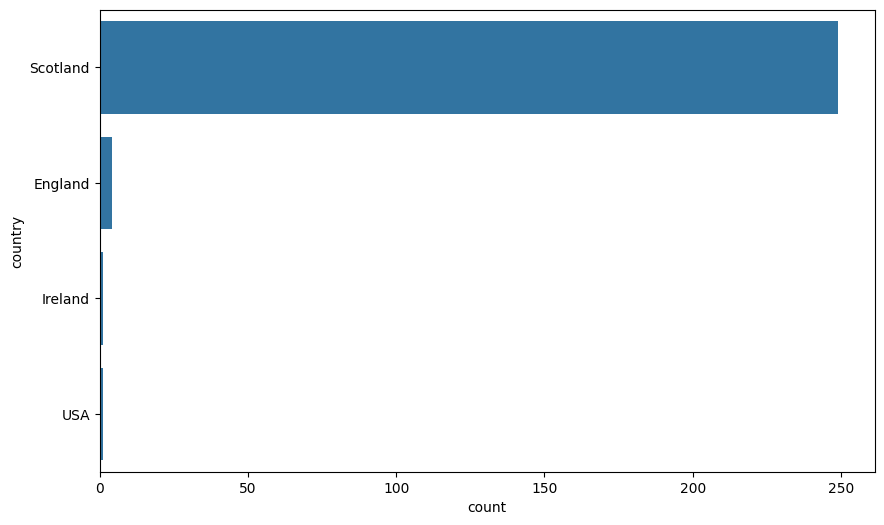

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


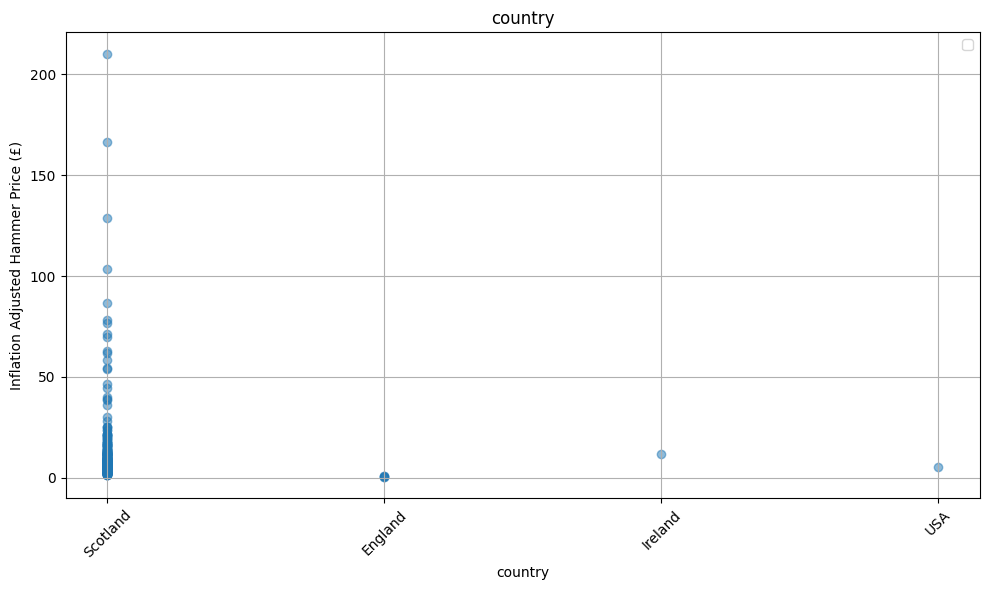



distillery_status
distillery_status
Operational    231
Undisclosed     15
Closed           9
Name: count, dtype: int64


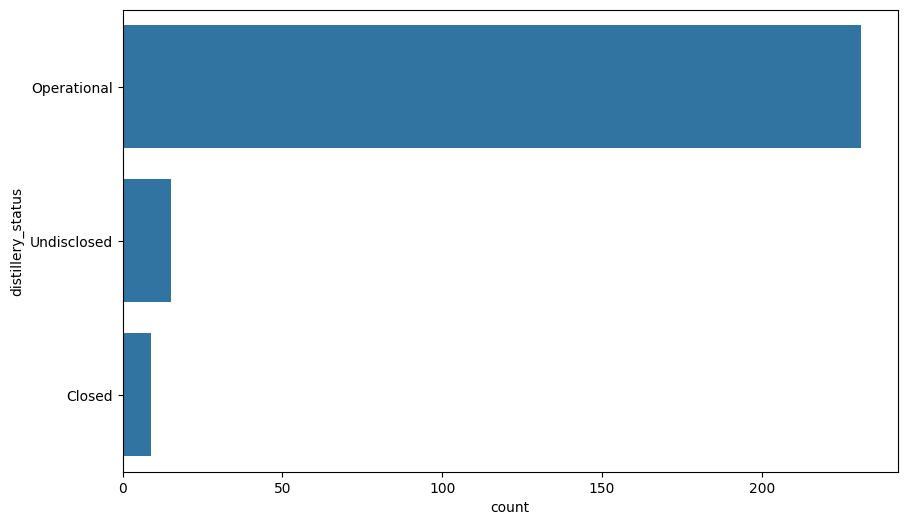

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


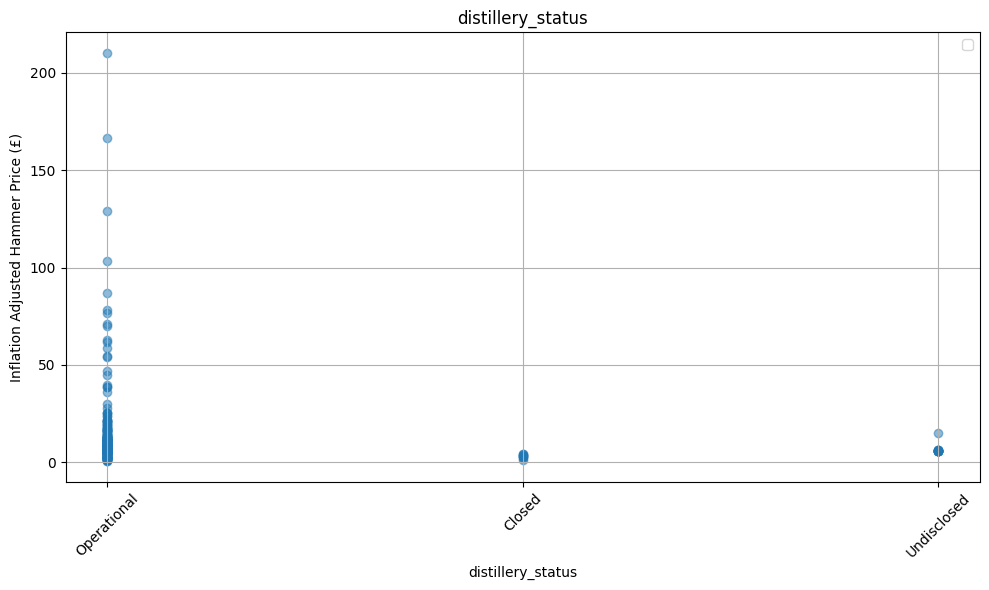



cask_type
cask_type
Barrel          100
Hogshead         77
Octave           24
Undisclosed      20
Quarter Cask     16
Butt             10
Barrique          8
Name: count, dtype: int64


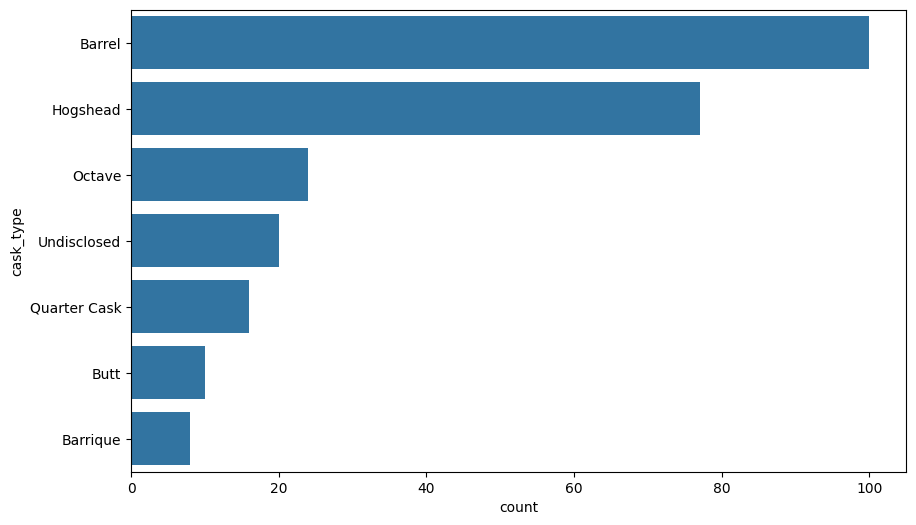

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


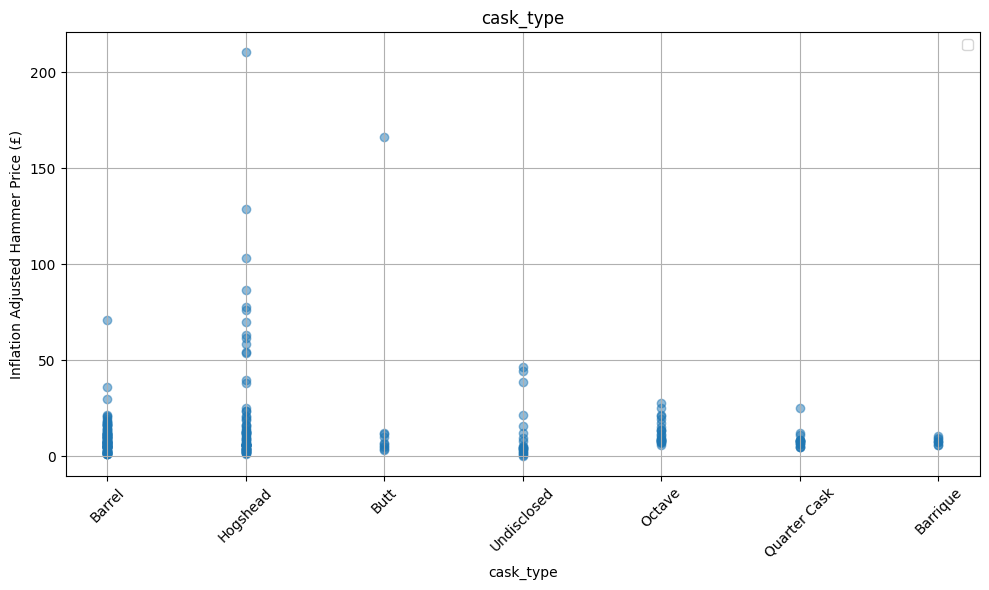



cask_filling
cask_filling
Undisclosed    125
First Fill      98
Second Fill     29
Virgin Oak       2
Third Fill       1
Name: count, dtype: int64


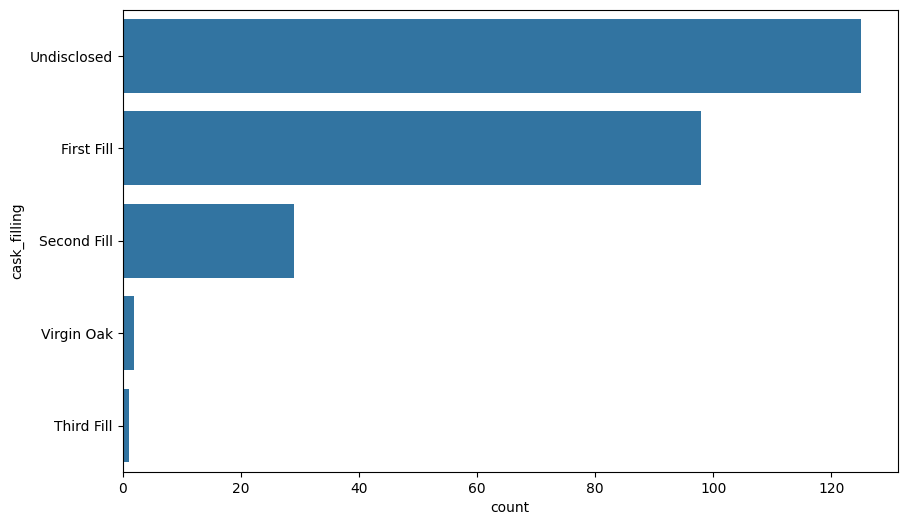

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


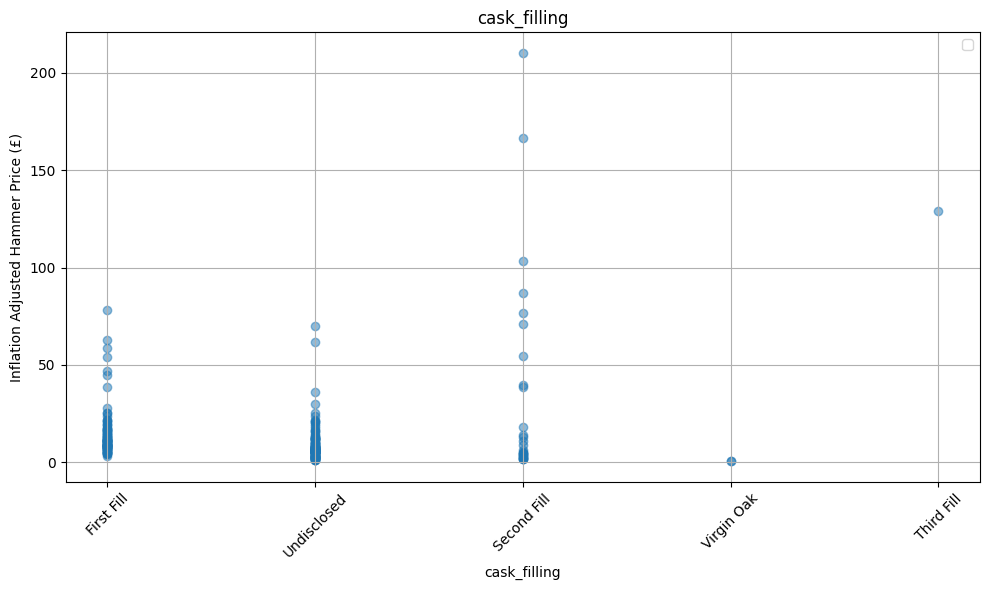



previous_spirit
previous_spirit
Bourbon        118
Sherry          93
Wine            17
Undisclosed     14
Rum              4
Virgin Oak       4
Port             3
Madeira          2
Name: count, dtype: int64


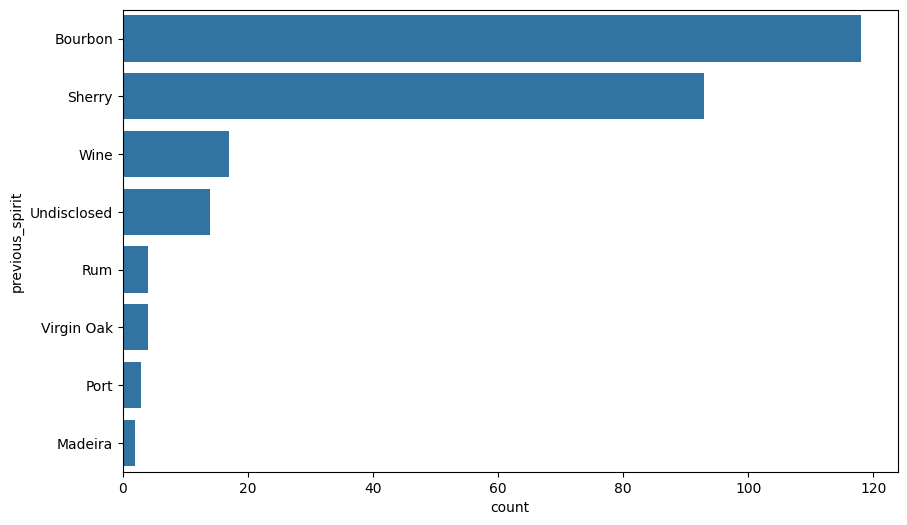

C:\Users\joaov\AppData\Local\Temp\ipykernel_5096\2902583713.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


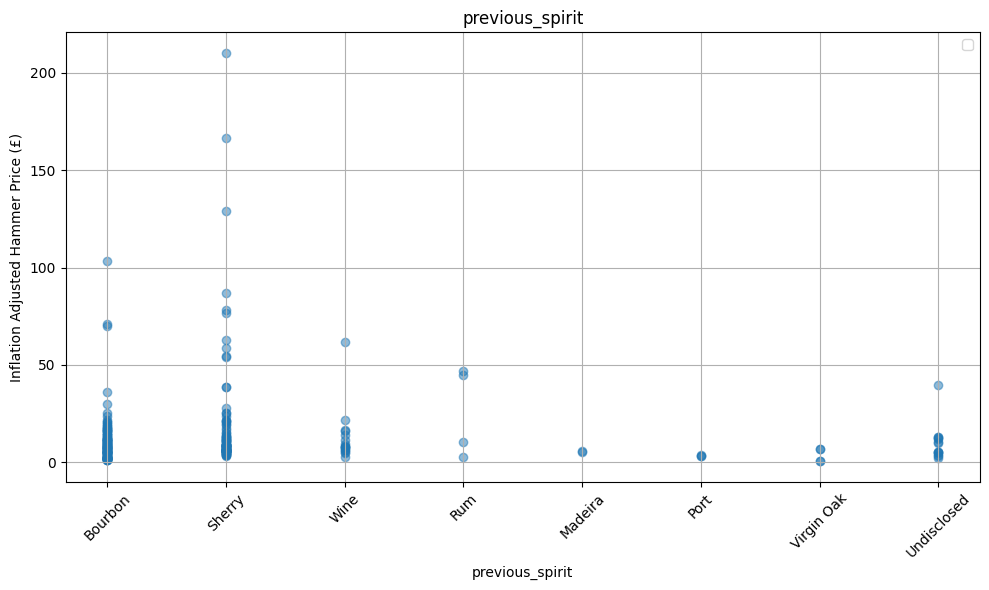

In [45]:
for column in categorical_columns:
    
    print(column)

    print(df[column].value_counts())

    plt.figure(figsize=(10, 6))
    sns.countplot(y=df[column], order=df[column].value_counts().index)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.scatter(df[column], df['inf_adj_hammer_price_per_litre_of_alcohol_per_age'], alpha=0.5)
    plt.title(column)
    plt.xlabel(column)
    plt.ylabel('Inflation Adjusted Hammer Price (£)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('\n')

In [46]:
pd.crosstab(df['cask_type'], df['previous_spirit'])

previous_spirit,Bourbon,Madeira,Port,Rum,Sherry,Undisclosed,Virgin Oak,Wine
cask_type,,,,,,,,
Barrel,90,0,0,2,1,5,2,0
Barrique,0,1,0,0,5,0,0,2
Butt,0,0,0,0,10,0,0,0
Hogshead,17,0,3,0,43,9,0,5
Octave,2,0,0,0,17,0,0,5
Quarter Cask,0,1,0,0,13,0,0,2
Undisclosed,9,0,0,2,4,0,2,3


# Data cleaning

In [47]:
# Columns with too mutch NaN values
df.drop(columns=['cask_filling', 'distillery_status'], inplace=True)

In [48]:
# Unused Y variable
df.drop(columns=['inf_adj_hammer_price_per_bottle_at_cask_strength'], inplace=True)

In [49]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.isnull().sum()

auction_date                                         0
distillery                                           0
region                                               0
country                                              0
strength                                             0
rla                                                  0
bulk_litres                                          0
cask_type                                            0
previous_spirit                                      0
age                                                  0
bottles_at_cask_strength                             0
volume_12m                                           0
volume_6m                                            0
volume_3m                                            0
inf_adj_hammer_price                                 0
inf_adj_hammer_price_per_litre_of_alcohol            0
inf_adj_hammer_price_per_litre_of_alcohol_per_age    0
inf_adj_hammer_price_per_age                         0
dtype: int

In [92]:
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR

    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].reset_index(drop=True)

    fig, axs = plt.subplots(1, 2, figsize=(6, 3))

    axs[0].hist(df[column], color='blue', alpha=0.5)
    axs[0].set_title(column)

    axs[1].hist(filtered_df[column], color='blue', alpha=0.5)
    axs[1].set_title(f'{column} - No Outliers')

    plt.show()

    return filtered_df

In [76]:
def transform_y_variable(df, column):

    # Log Transformation

    y_log = np.log(df[column])

    df_log = df.copy()
    df_log[column] = y_log

    # Box-Cox Transformation

    y_boxcox, fitted_lambda = boxcox(df[column])

    df_boxcox = df.copy()
    df_boxcox[column] = y_boxcox

    return df_log, df_boxcox

In [81]:
def y_variable_analysis(df, y_variable):

    df_log, df_boxcox = transform_y_variable(df, y_variable)

    df_no_outliers = remove_outliers(df, y_variable)
    df_log_no_outliers = remove_outliers(df_log, y_variable)
    df_boxcox_no_outliers = remove_outliers(df_boxcox, y_variable)

    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    axs[0, 0].scatter(df_no_outliers['age'], df_no_outliers[y_variable], label=y_variable, marker='o')
    axs[0, 0].set_title(f'{y_variable} - Age')
    axs[0, 0].set_xlabel('Age')
    axs[0, 0].set_ylabel(f'{y_variable}')
    axs[0, 0].grid()
    axs[0, 0].legend()

    axs[0, 1].scatter(df_log_no_outliers['age'], df_log_no_outliers[y_variable], label=y_variable, marker='o')
    axs[0, 1].set_title(f'Log({y_variable}) - Age')
    axs[0, 1].set_xlabel('Age')
    axs[0, 1].set_ylabel(f'Log({y_variable})')
    axs[0, 1].grid()
    axs[0, 1].legend()

    axs[1, 0].scatter(df_boxcox_no_outliers['age'], df_boxcox_no_outliers[y_variable], label=y_variable, marker='o')
    axs[1, 0].set_title(f'BoxCox({y_variable}) - Age')
    axs[1, 0].set_xlabel('Age')
    axs[1, 0].set_ylabel(f'BoxCox({y_variable})')
    axs[1, 0].grid()
    axs[1, 0].legend()

    plt.tight_layout()
    plt.show()

inf_adj_hammer_price


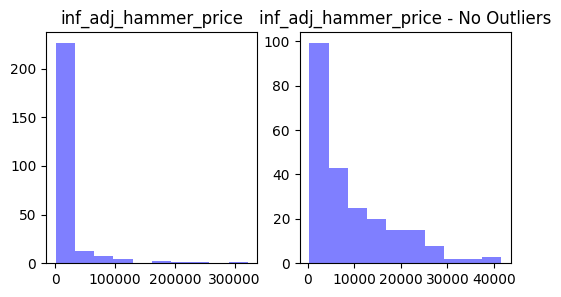

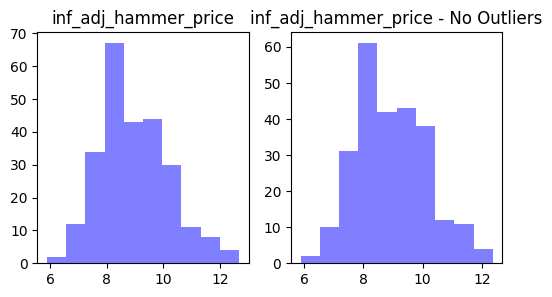

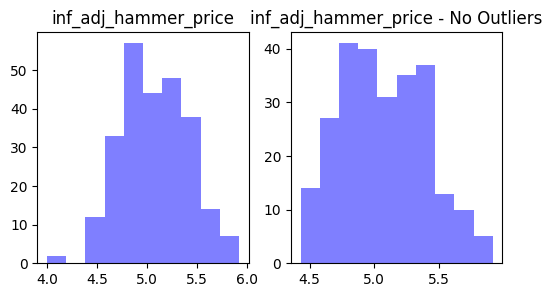

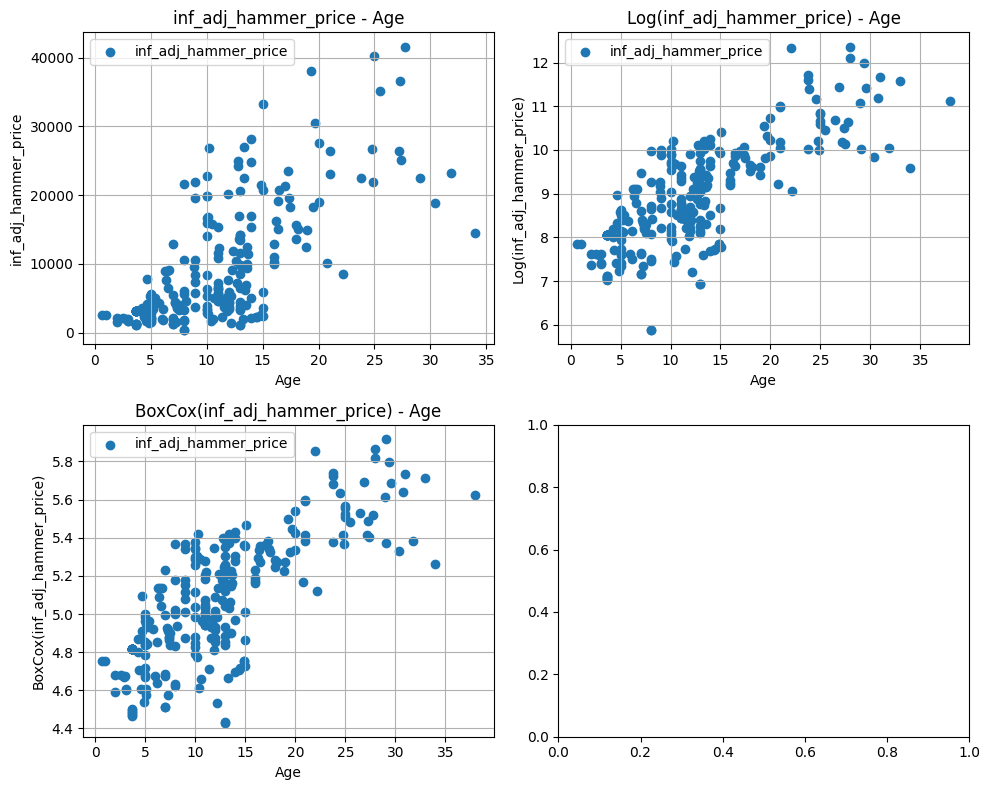



inf_adj_hammer_price_per_litre_of_alcohol


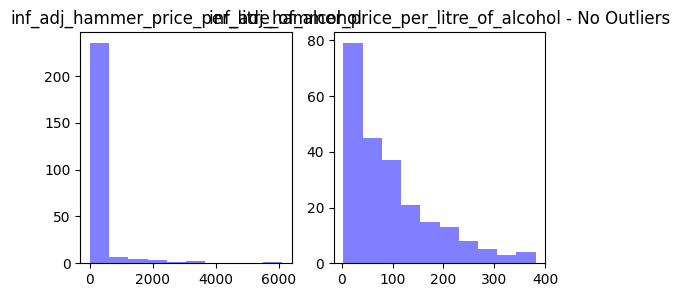

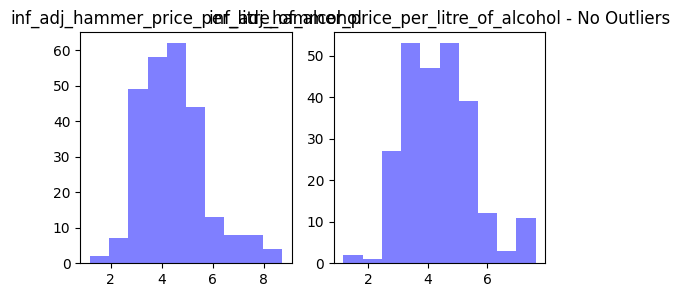

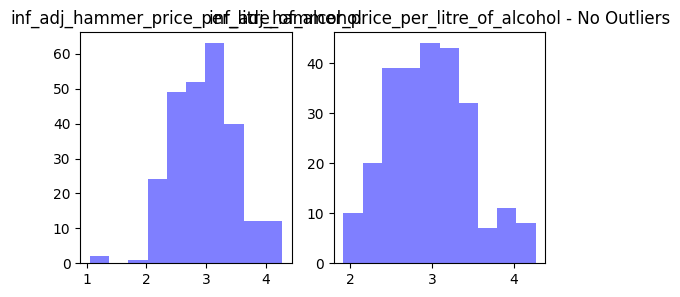

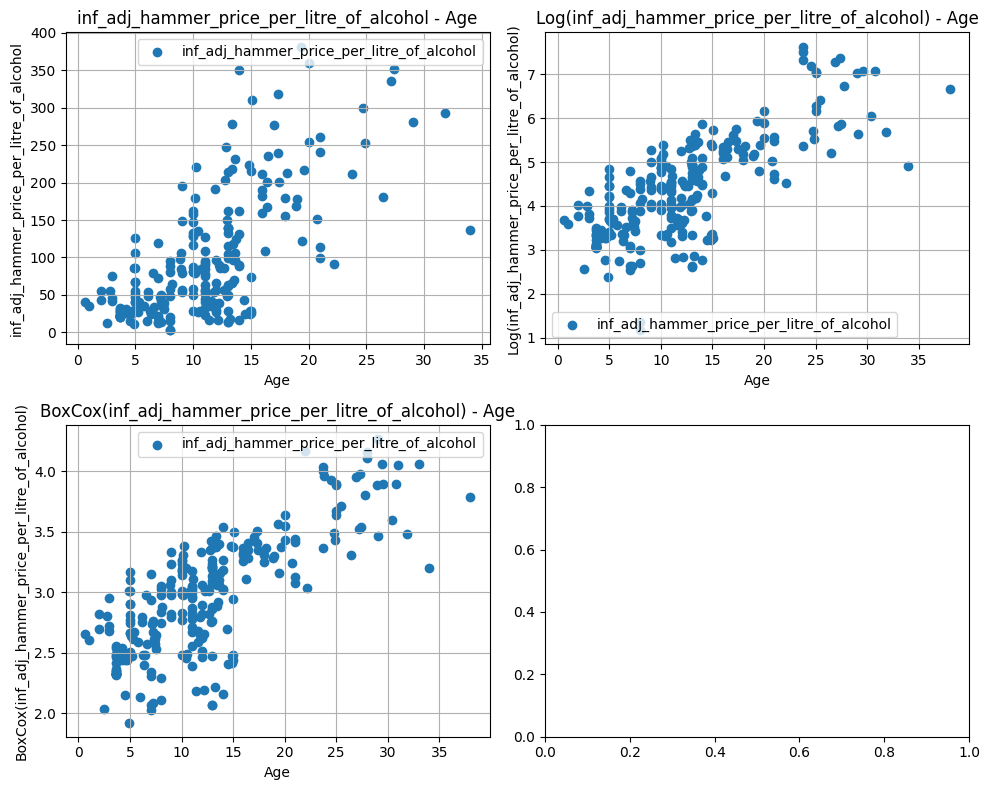



inf_adj_hammer_price_per_age


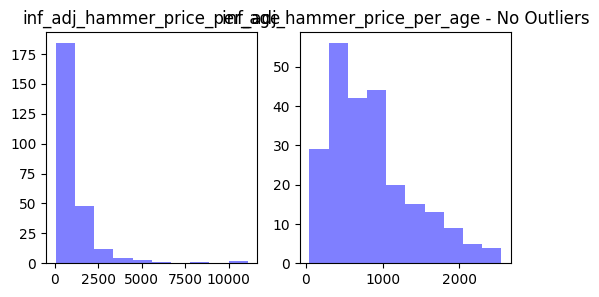

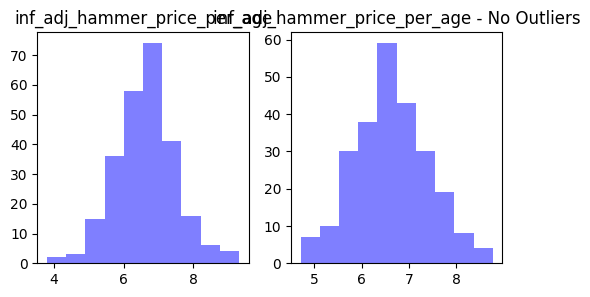

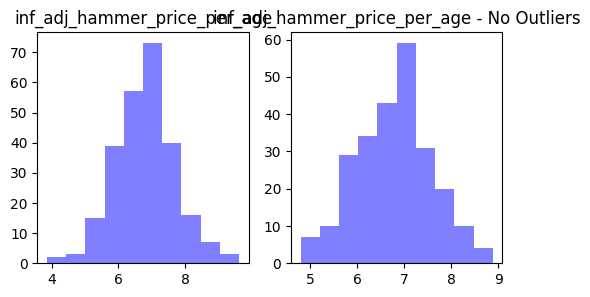

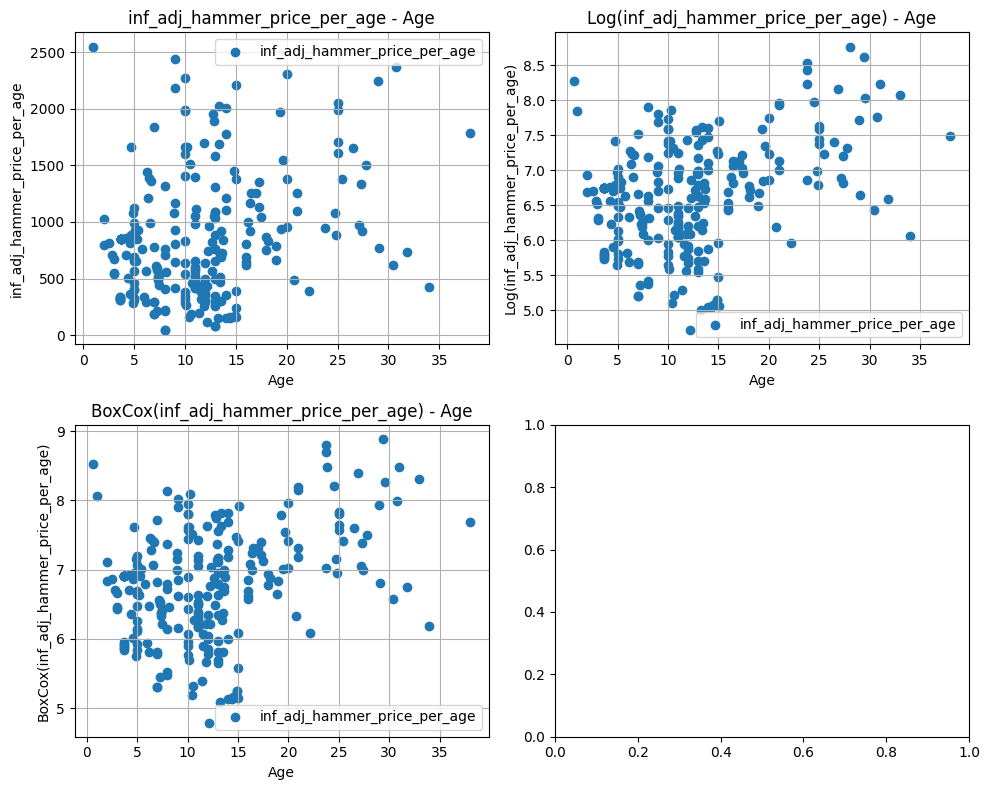



inf_adj_hammer_price_per_litre_of_alcohol_per_age


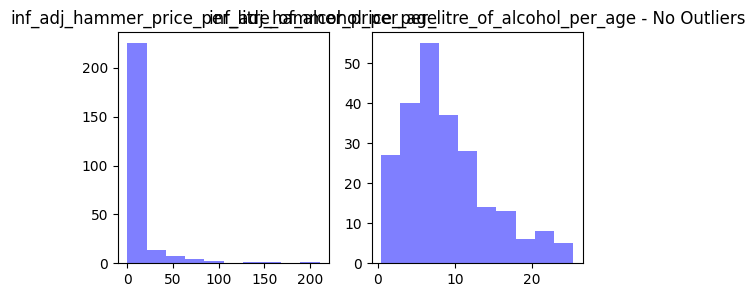

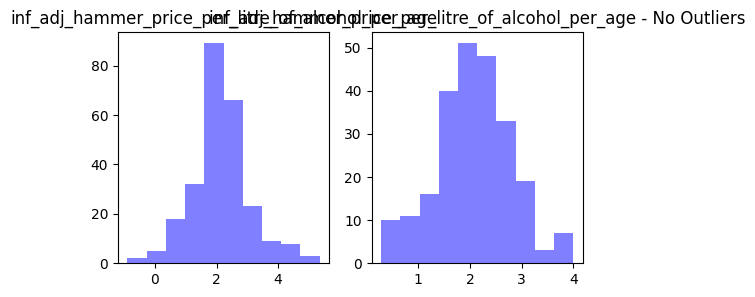

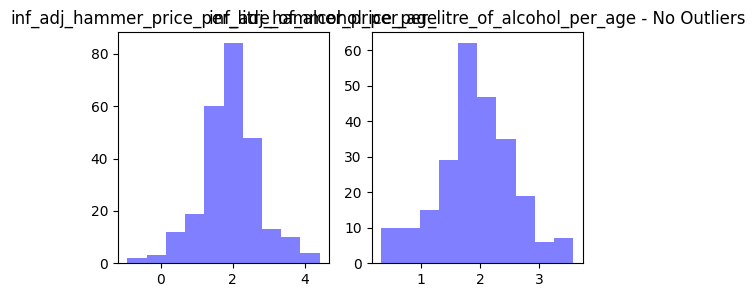

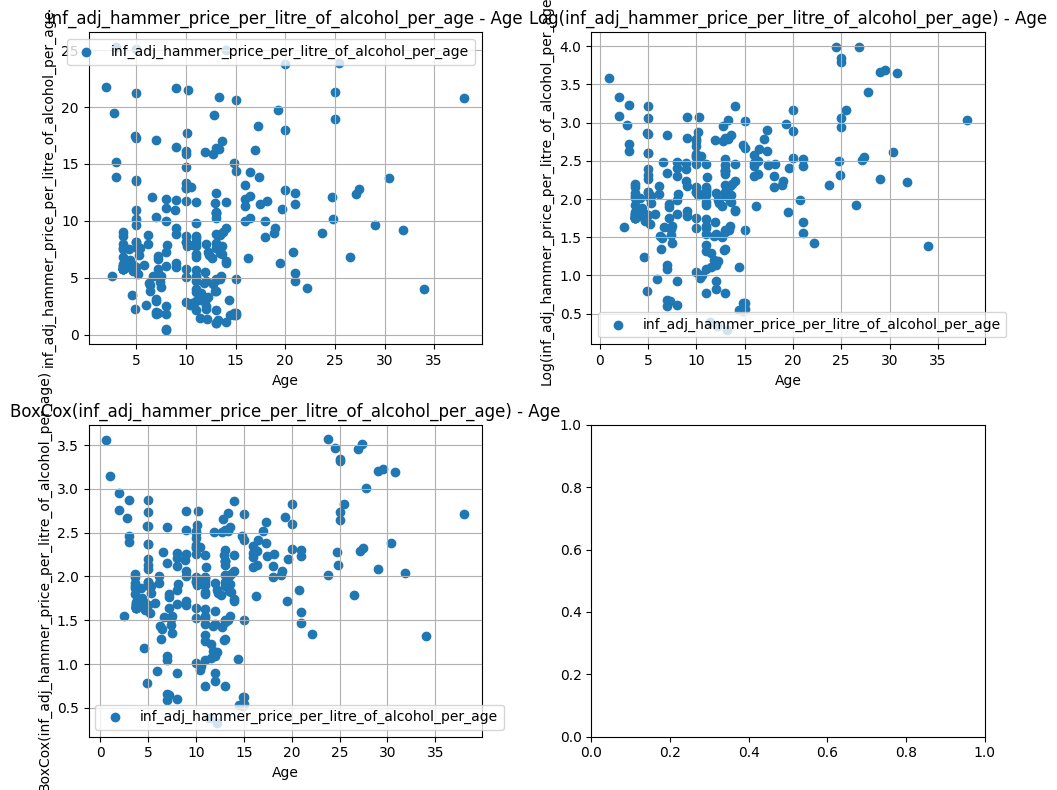

In [94]:
for col in['inf_adj_hammer_price', 'inf_adj_hammer_price_per_litre_of_alcohol', 'inf_adj_hammer_price_per_age', 'inf_adj_hammer_price_per_litre_of_alcohol_per_age']:
    print(col)
    y_variable_analysis(df, col)
    print('\n')

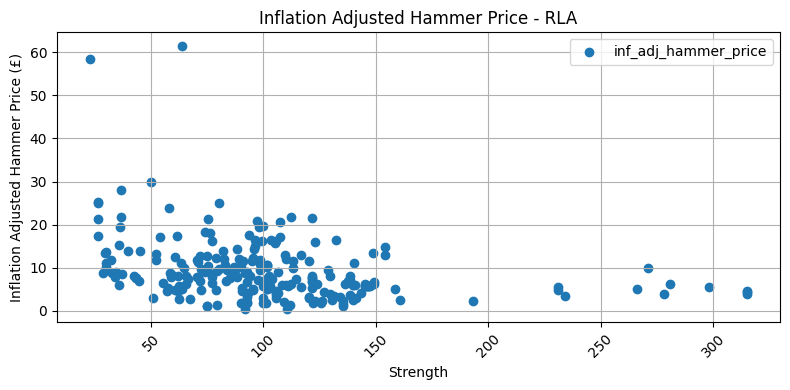

In [72]:
plt.figure(figsize=(8, 4))
plt.scatter(df['rla'], df['inf_adj_hammer_price_per_litre_of_alcohol_per_age'], label='inf_adj_hammer_price', marker='o')
plt.title('Inflation Adjusted Hammer Price - RLA')
plt.xlabel('Strength')
plt.ylabel('Inflation Adjusted Hammer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

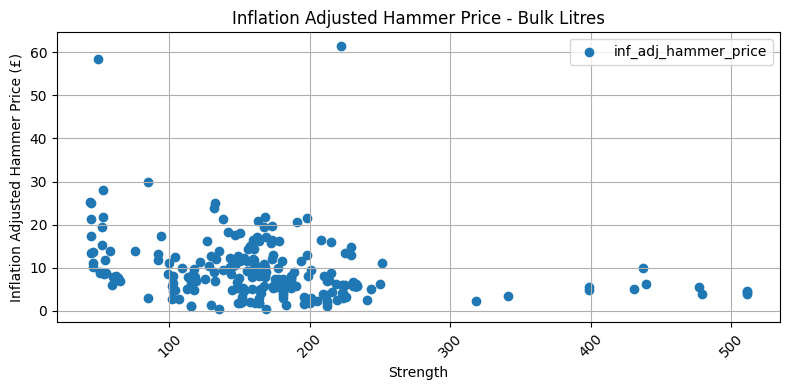

In [73]:
plt.figure(figsize=(8, 4))
plt.scatter(df['bulk_litres'], df['inf_adj_hammer_price_per_litre_of_alcohol_per_age'], label='inf_adj_hammer_price', marker='o')
plt.title('Inflation Adjusted Hammer Price - Bulk Litres')
plt.xlabel('Strength')
plt.ylabel('Inflation Adjusted Hammer Price (£)')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()